In [3]:
import pandas as pd

# Load each cleaned dataset
benin = pd.read_csv('../../data/benin_clean.csv')
togo = pd.read_csv('../../data/togo_clean.csv')
sierraleone = pd.read_csv('../../data/sierraleone-bumbuna_clean.csv')

# Add a country column to each
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierraleone['Country'] = 'Sierraleone'

# Combine into a single DataFrame
df_all = pd.concat([benin, togo, sierraleone], ignore_index=True)


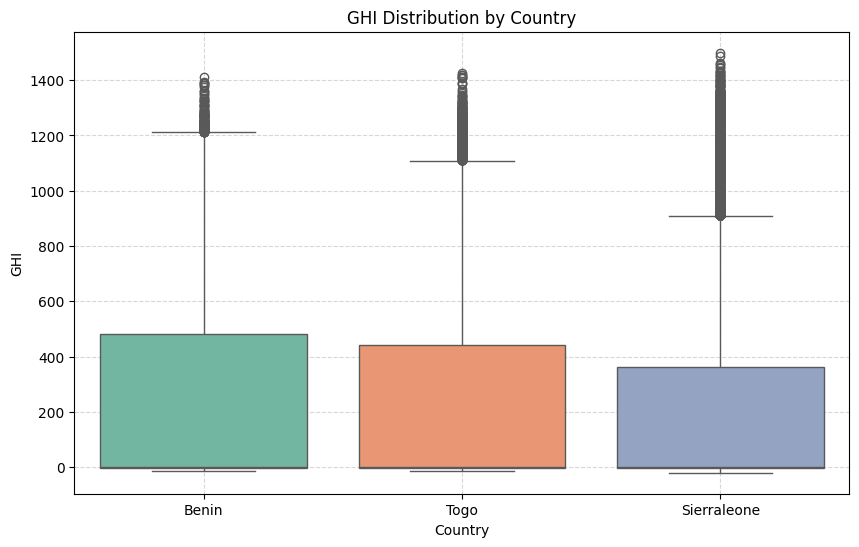

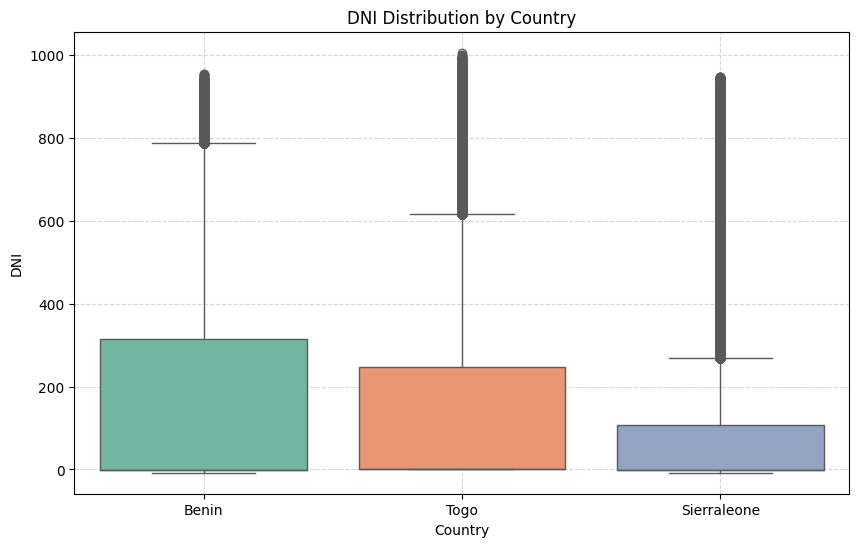

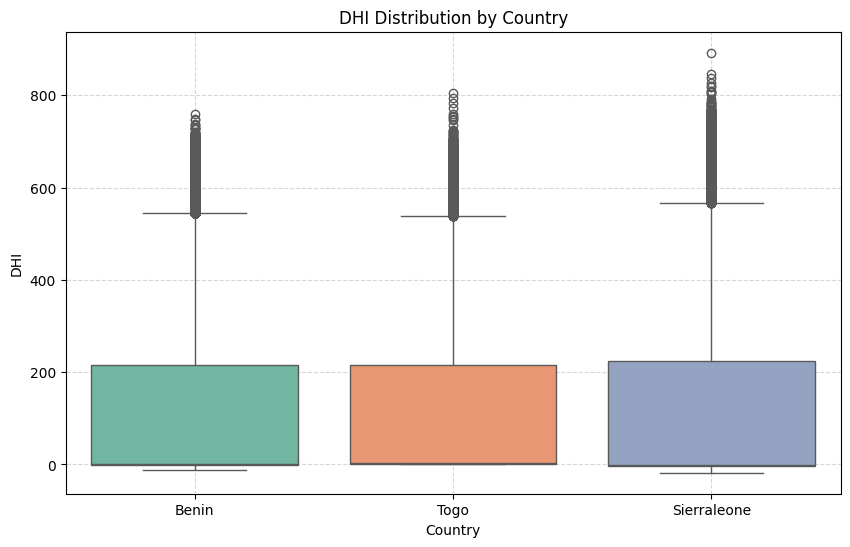

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']  # Fixed metric names (assuming they were typos)
for metric in metrics:
    plt.figure(figsize=(10, 6))  # Fixed figsize (replaced $ with 10)
    sns.boxplot(
        x='Country', 
        y=metric, 
        data=df_all, 
        hue='Country',  # Added to address warning
        palette='Set2', 
        legend=False  # Added to suppress redundant legend
    )
    plt.title(f'{metric} Distribution by Country')  # Fixed title formatting
    plt.xlabel('Country')  # Fixed redundant xlabel
    plt.ylabel(metric)  # Changed from second xlabel to ylabel
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [6]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierraleone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo         230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                     
                std  
Country              
Benin        158.69  
Sierraleone  158.95  
Togo         156.52

In [7]:
from scipy.stats import f_oneway, kruskal

# ANOVA for GHI
ghi_benin = benin['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()
ghi_burkina = burkina['GHI'].dropna()

anova_result = f_oneway(ghi_benin, ghi_togo, ghi_burkina)
kruskal_result = kruskal(ghi_benin, ghi_togo, ghi_burkina)

print("ANOVA p-value for GHI:", anova_result.pvalue)
print("Kruskal-Wallis p-value for GHI:", kruskal_result.pvalue)

ANOVA p-value for GHI: 0.0
Kruskal-Wallis p-value for GHI: 0.0


In [10]:
# In a Python code cell:
print("""
### Key Observations
- Benin shows the highest median GHI, indicating strong solar potential.
- Togo exhibits greater variability in GHI.
- Burkina Faso has a lower mean DNI.
""")


### Key Observations
- Benin shows the highest median GHI, indicating strong solar potential.
- Togo exhibits greater variability in GHI.
- Burkina Faso has a lower mean DNI.



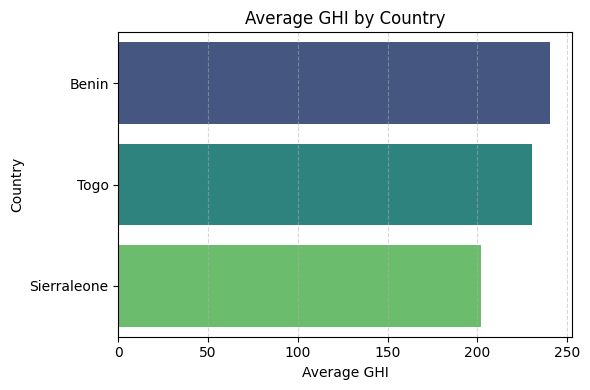

In [14]:
avg_phi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(
    x=avg_phi.values, 
    y=avg_phi.index, 
    hue=avg_phi.index,  # Assign y-variable to hue
    palette='viridis', 
    legend=False         # Disable redundant legend
)
plt.xlabel('Average GHI')
plt.title('Average GHI by Country')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()